<a href="https://colab.research.google.com/github/amineceyda/Data-Analysis-Intro/blob/main/HackathonVeriAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Veri seti temizleme

In [47]:
import pandas as pd

In [ ]:
data = pd.read_csv('hackathon_data.csv')
data.head()

In [ ]:
data.tail()

In [ ]:
data.isna().any() # Veri setindeki eksik verileri tespit edip uygun değerler ile doldurmak için

In [51]:
data['IslemTutar'].fillna(0.00, inplace=True)
date_columns = ['IslemTarih', 'UyeAktivasyonTarih', 'SurumTarih']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')
   # data[col].fillna('2015-01-01 00:00:00', inplace=True) #bilinmeyen tarihleri böyle bir tarihle doldursak bu satrı silersek NaT şeklinde de kalabilir emin olamadım

data['Tercih'].fillna('Bilinmiyor', inplace=True)
data['Versiyon'].fillna('Bilinmiyor', inplace=True)

In [ ]:
data.isna().sum()

In [ ]:
data.duplicated()

In [ ]:
data['Tercih'] = data['Tercih'].astype(str)
data['Versiyon'] = data['Versiyon'].astype(str)
data['IslemTutar'] = pd.to_numeric(data['IslemTutar'], errors='coerce')

#Marka aynıysada yanlış girildiyse diye
data['Marka'] = data['Marka'].str.strip()
data['Marka'] = data['Marka'].str.lower()

data['UyeAdres'] = data['UyeAdres'].str.replace(r'[^a-zA-Z0-9\s]', '')

In [56]:
# IQR yöntemi ile aykırı değerleri tanımlama ve eleme
Q1 = data['IslemTutar'].quantile(0.25)
Q3 = data['IslemTutar'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['IslemTutar'] >= lower_bound) & (data['IslemTutar'] <= upper_bound)]

In [57]:
data.to_csv('cleaned_data.csv', index=False)

# Örnek Analizler

In [65]:
from datetime import datetime, timedelta

In [ ]:
data = pd.read_csv('cleaned_data.csv')

In [102]:
# Veri setinin temel istatistiklerini görüntüleme
basic_stats = data.describe()
print(basic_stats)

# Belirli bir sütunun ortalama değerini almak
mean_value = data['IslemTutar'].mean()
print("Ortalama Değer:", mean_value)

                 id       IslemID     IslemTutar      IslemSaat
count  8.910730e+05  8.910730e+05  891073.000000  891073.000000
mean   3.010237e+08  4.475794e+08      57.795797      15.407199
std    8.342958e+03  5.178086e+07      46.365523       4.265807
min    3.010025e+08  4.010031e+08       1.010000       0.000000
25%    3.010245e+08  4.063467e+08      23.000000      13.000000
50%    3.010256e+08  4.258246e+08      43.000000      16.000000
75%    3.010299e+08  4.735799e+08      80.000000      18.000000
max    3.010330e+08  6.146196e+08     215.000000      23.000000
Ortalama Değer: 57.795797314024796


In [96]:
#İşlem tipleri nelerdir
islem_tipleri = data['Tercih'].unique()

print("İşlem tipleri:")
for islem_tipi in islem_tipleri:
    print(islem_tipi)

İşlem tipleri:
CeptePos
ÖKC
SadePos


In [ ]:
#Pasif üyeler kimlerdir
uye_durumlar = data['UyeDurum'].unique()

# "Passif" üyeleri bulun
passif_uyeler = data[data['UyeDurum'] == 'Pasif']

# "Passif" üyeleri listeleyin
print("Passif Üyeler:")
print(passif_uyeler)

In [99]:
#Üyelerin yüzde kaçı aktiftir?
aktif_uye_sayisi = len(data[data['UyeDurum'] == 'Aktif'])

# Toplam üye sayısını hesaplayın
toplam_uye_sayisi = len(data)

# Aktif üyelerin yüzdesini hesaplayın
aktif_uye_yuzdesi = (aktif_uye_sayisi / toplam_uye_sayisi) * 100

# Sonucu yazdırın
print(f"Aktif Üyelerin Yüzdesi: {aktif_uye_yuzdesi:.2f}%")

Aktif Üyelerin Yüzdesi: 60.42%


In [100]:
#ilk işlem yapılan tarih ve son işlem yapılan tarih nedir?
data['IslemTarih'] = pd.to_datetime(data['IslemTarih'])

# Tarihleri sıralayın ve en eski ile en yeni tarihi bulun
ilk_islem_tarihi = data['IslemTarih'].min()
son_islem_tarihi = data['IslemTarih'].max()

# Sonuçları yazdırın
print(f"İlk İşlem Yapılan Tarih: {ilk_islem_tarihi}")
print(f"Son İşlem Yapılan Tarih: {son_islem_tarihi}")

İlk İşlem Yapılan Tarih: 2014-09-25 10:08:52
Son İşlem Yapılan Tarih: 2023-10-26 16:59:00


In [70]:
#Toplam işlem sayısı nedir
toplam_islem_sayisi = data['IslemID'].nunique()

print(f"Toplam işlem sayısı: {toplam_islem_sayisi}")

Toplam işlem sayısı: 891073


In [72]:
#Son 10 günde kaç işlem gerçekleşti
# İşlem tarihlerini datetime veri türüne dönüştürün
data['IslemTarih'] = pd.to_datetime(data['IslemTarih'])

# Şuanki tarihi alın
bugun = datetime.today()

# 10 gün önceki tarihi hesaplayın
on_gun_once = bugun - timedelta(days=10)

# Son 10 günde gerçekleşen işlemleri filtreleyin
son_10_gun_islemleri = data[(data['IslemTarih'] >= on_gun_once) & (data['IslemTarih'] <= bugun)]

# Son 10 günde gerçekleşen işlem sayısını hesaplayın
son_10_gun_islem_sayisi = len(son_10_gun_islemleri)

print(f"Son 10 günde gerçekleşen işlem sayısı: {son_10_gun_islem_sayisi}")

Son 10 günde gerçekleşen işlem sayısı: 2798


In [74]:
#Hangi işlem tipi en fazla gerçekleşmiştir?

# İşlem tiplerini sayın
islem_tipleri_sayisi = data['Tercih'].value_counts()

# En fazla tekrarlanan işlem tipini bulun
en_fazla_tekrarlanan_islem_tipi = islem_tipleri_sayisi.idxmax()
en_fazla_tekrar_sayisi = islem_tipleri_sayisi.max()

print(f"Hangi işlem tipi en fazla gerçekleşmiştir?")
print(f"'{en_fazla_tekrarlanan_islem_tipi}' işlem tipi {en_fazla_tekrar_sayisi} kez gerçekleştirilmiştir.")

Hangi işlem tipi en fazla gerçekleşmiştir?
'ÖKC' işlem tipi 838247 kez gerçekleştirilmiştir.


In [76]:
#En yüksek işlem tutarı ne kadardır?
en_yuksek_islem_tutari = data['IslemTutar'].max()

print(f"En yüksek işlem tutarı ne kadardır?")
print(f"En yüksek işlem tutarı {en_yuksek_islem_tutari} TL'dir.")

En yüksek işlem tutarı ne kadardır?
En yüksek işlem tutarı 215.0 TL'dir.


In [77]:
#En düşük işlem tutarı ne kadardır?
en_dusuk_islem_tutari = data['IslemTutar'].min()

print(f"En düşük işlem tutarı ne kadardır?")
print(f"En düşük işlem tutarı {en_dusuk_islem_tutari} TL'dir.")

En düşük işlem tutarı ne kadardır?
En düşük işlem tutarı 1.01 TL'dir.


In [78]:
#Ortalama işlem tutarı nedir?
ortalama_islem_tutari = data['IslemTutar'].mean()

print("Ortalama işlem tutarı nedir?")
print(f"Ortalama işlem tutarı: {ortalama_islem_tutari:.2f} TL")

Ortalama işlem tutarı nedir?
Ortalama işlem tutarı: 57.80 TL


In [79]:
#Hangi şehirde en çok işlem yapılmıştır?
sehir_islem_sayilari = data['Sehir'].value_counts()

# En fazla işlem yapılan şehri belirleyin
en_fazla_islem_yapilan_sehir = sehir_islem_sayilari.idxmax()
en_fazla_islem_sayisi = sehir_islem_sayilari.max()

print("Hangi şehirde en çok işlem yapılmıştır?")
print(f"{en_fazla_islem_yapilan_sehir} şehrinde en fazla işlem yapılmıştır. ({en_fazla_islem_sayisi} işlem)")

Hangi şehirde en çok işlem yapılmıştır?
İstanbul şehrinde en fazla işlem yapılmıştır. (613742 işlem)


In [80]:
#Hangi kullanıcı tipi en fazla işlem yapmıştır? saçma bir soru oldu neyse
kullanici_tipi_islem_sayilari = data['UyeDurum'].value_counts()

# En fazla işlem yapan kullanıcı tipini belirleyin
en_fazla_islem_yapan_kullanici_tipi = kullanici_tipi_islem_sayilari.idxmax()
en_fazla_islem_sayisi = kullanici_tipi_islem_sayilari.max()

print("Hangi kullanıcı tipi en fazla işlem yapmıştır?")
print(f"{en_fazla_islem_yapan_kullanici_tipi} kullanıcı tipi en fazla işlem yapmıştır. ({en_fazla_islem_sayisi} işlem)")

Hangi kullanıcı tipi en fazla işlem yapmıştır?
Aktif kullanıcı tipi en fazla işlem yapmıştır. (538365 işlem)


In [81]:
#Belirli bir tarihte kaç işlem gerçekleşti?

# İlgili tarihi seçin (örneğin, '2023-10-15')
secilen_tarih = '2023-10-15'

# Seçilen tarihe sahip işlemleri filtreleyin
secilen_tarihe_gore_islemler = data[data['IslemTarih'].dt.date == pd.to_datetime(secilen_tarih).date()]

# Seçilen tarihte kaç işlem gerçekleştiğini hesaplayın
islem_sayisi = len(secilen_tarihe_gore_islemler)

print(f"{secilen_tarih} tarihinde toplam {islem_sayisi} işlem gerçekleşmiştir.")

2023-10-15 tarihinde toplam 409 işlem gerçekleşmiştir.


In [82]:
#Belirli bir işlem türünde kaç işlem yapılmıştır?

# İlgili işlem türünü seçin (örneğin, 'CeptePos')
secilen_islem_turu = 'CeptePos'

# Seçilen işlem türüne sahip işlemleri filtreleyin
secilen_islem_turune_gore_islemler = data[data['Tercih'] == secilen_islem_turu]

# Seçilen işlem türünde kaç işlem yapıldığını hesaplayın
islem_sayisi = len(secilen_islem_turune_gore_islemler)

print(f"{secilen_islem_turu} işlem türünde toplam {islem_sayisi} işlem yapılmıştır.")

CeptePos işlem türünde toplam 52463 işlem yapılmıştır.


In [83]:
#Son 10 günde hangi marka en fazla işlem yapmıştır?
bugun = datetime.today()
baslangic_tarihi = bugun - timedelta(days=10)

# Belirlenen zaman aralığına ait işlemleri filtreleyin
son_10_gun_islemleri = data[data['IslemTarih'] >= baslangic_tarihi]

# Hangi markanın en fazla işlem yaptığını hesaplayın
en_fazla_islem_yapan_marka = son_10_gun_islemleri['Marka'].value_counts().idxmax()

# En fazla işlem yapan marka ve işlem sayısını yazdırın
en_fazla_islem_sayisi = son_10_gun_islemleri['Marka'].value_counts().max()

print(f"Son 10 günde en fazla işlem yapan marka: {en_fazla_islem_yapan_marka}, Toplam işlem sayısı: {en_fazla_islem_sayisi}")

Son 10 günde en fazla işlem yapan marka: aida aka gida, Toplam işlem sayısı: 664


In [86]:
#Hangi saat diliminde en çok işlem gerçekleşmiştir?

# İşlem tarihinden saat bilgisini ayıklayın
data['IslemSaat'] = data['IslemTarih'].dt.hour

# Hangi saat diliminde ne kadar işlem yapıldığını hesaplayın
saat_dilimi_islemleri = data['IslemSaat'].value_counts()

# En fazla işlemin hangi saat diliminde gerçekleştiğini bulun
en_fazla_islem_yapilan_saat = saat_dilimi_islemleri.idxmax()
en_fazla_islem_sayisi = saat_dilimi_islemleri.max()

print(f"En fazla işlem {en_fazla_islem_yapilan_saat}. saat diliminde gerçekleşmiştir. Toplam işlem sayısı: {en_fazla_islem_sayisi}")

En fazla işlem 18. saat diliminde gerçekleşmiştir. Toplam işlem sayısı: 87694


In [87]:
#En fazla işlem yapan ilk 5 işyeri hangileridir?
en_fazla_islem_yapan_isyerleri = data['Marka'].value_counts()

# İşlem sayısına göre işyerlerini sıralayın ve ilk 5 işyerini seçin
ilk_5_isyeri = en_fazla_islem_yapan_isyerleri.head(5)

print("En fazla işlem yapan ilk 5 işyeri:")
print(ilk_5_isyeri)

En fazla işlem yapan ilk 5 işyeri:
nfka nu yufka    145830
eket ermarket     77035
aziz ab leziz     48235
biye bakaliye     47868
hdeo he video     47521
Name: Marka, dtype: int64


In [88]:
#Son 5 günde hangi işlem tipi ile ne kadar işlem yapılmıştır?
end_date = datetime.today()
start_date = end_date - timedelta(days=5)

# Tarih aralığına uyan işlemleri seçin
son_10_gun_islemleri = data[(data['IslemTarih'] >= start_date) & (data['IslemTarih'] <= end_date)]

# İşlem tiplerine göre gruplandırın
gruplu_islemler = son_10_gun_islemleri.groupby('Tercih')

# Her işlem tipinde yapılan işlem sayılarını ve toplam işlem tutarlarını hesaplayın
islemler_ve_tutarlar = gruplu_islemler.agg({'IslemID': 'count', 'IslemTutar': 'sum'})

print("Son 5 günde hangi işlem tipi ile ne kadar işlem yapılmıştır:")
print(islemler_ve_tutarlar)

Son 5 günde hangi işlem tipi ile ne kadar işlem yapılmıştır:
        IslemID  IslemTutar
Tercih                     
ÖKC         633    58267.45


In [90]:
#belirli bir şehirde en fazla hangi işlem tipinin gerçekleştiği ve toplam işlem sayısı
# İşlem yapılacak belirli bir şehiri seçin
hedef_sehir = "Samsun"

# Belirli şehirde gerçekleşen işlemleri seçin
belirli_sehir_islemleri = data[data['Sehir'] == hedef_sehir]

# İşlem tiplerine göre gruplandırın
gruplu_islemler = belirli_sehir_islemleri.groupby('Tercih')

# Her işlem tipinde yapılan işlem sayılarını hesaplayın
islemler_ve_sayilar = gruplu_islemler.agg({'IslemID': 'count'})

# En fazla işlem yapılan işlem tipini bulun
en_fazla_islem_tipi = islemler_ve_sayilar.idxmax()[0]
toplam_islem_sayisi = islemler_ve_sayilar.max()[0]

print(f"{hedef_sehir} şehrinde en fazla işlem yapılan işlem tipi: {en_fazla_islem_tipi} ({toplam_islem_sayisi} işlem)")

Samsun şehrinde en fazla işlem yapılan işlem tipi: ÖKC (26543 işlem)


In [92]:
#Son 10 günde en fazla işlemi hangi kullanıcı yapmıştır?

end_date = datetime.today()
start_date = end_date - timedelta(days=10)

# Tarih aralığına uyan işlemleri seçin
son_10_gun_islemleri = data[(data['IslemTarih'] >= start_date) & (data['IslemTarih'] <= end_date)]

# Kullanıcıları gruplandırın ve her kullanıcının yaptığı işlem sayısını hesaplayın
kullanicilar_ve_sayilar = son_10_gun_islemleri.groupby('id').agg({'IslemID': 'count'})

# En fazla işlemi yapan kullanıcıyı ve yaptığı işlem sayısını bulun
en_fazla_islem_yapan_kullanici = kullanicilar_ve_sayilar.idxmax()[0]
toplam_islem_sayisi = kullanicilar_ve_sayilar.max()[0]

print(f"Son 10 günde en fazla işlemi yapan kullanıcı: {en_fazla_islem_yapan_kullanici} ({toplam_islem_sayisi} işlem)")

Son 10 günde en fazla işlemi yapan kullanıcı: 301003354 (664 işlem)


In [93]:
#Belirli bir işlem türünün ortalama tutarı nedir?

# İlgilenilen işlem türünü belirleyin
ilgilenilen_islem_turu = "CeptePos"  # Değiştirmeniz gereken işlem türünü burada belirtin

# İlgilenilen işlem türünü içeren veriyi filtreleyin
filtrelenmis_veri = data[data['Tercih'] == ilgilenilen_islem_turu]

# İlgilenilen işlem türünün ortalama tutarını hesaplayın
ortalama_tutar = filtrelenmis_veri['IslemTutar'].mean()

print(f"{ilgilenilen_islem_turu} işlem türünün ortalama tutarı: {ortalama_tutar:.2f}")

CeptePos işlem türünün ortalama tutarı: 75.51


In [94]:
#Hangi kullanıcı en fazla işlem tutarı gerçekleştirmiştir?
# Kullanıcı başına toplam işlem tutarını hesaplayın
kullanici_bazinda_islem_tutarlari = data.groupby('id')['IslemTutar'].sum()

# En yüksek toplam işlem tutarına sahip kullanıcıyı bulun
en_yuksek_tutarli_kullanici = kullanici_bazinda_islem_tutarlari.idxmax()

print(f"En fazla işlem tutarına sahip kullanıcı ID'si: {en_yuksek_tutarli_kullanici}")

En fazla işlem tutarına sahip kullanıcı ID'si: 301025608


In [95]:
#En yüksek işlem tutarına sahip olan işlem kimin tarafından yapılmıştır?
# Tüm işlemlerin işlem tutarlarını ve işlem ID'lerini alın
islem_tutarlari = data['IslemTutar']
islem_idleri = data['IslemID']

# En yüksek işlem tutarına sahip olan işlem ID'sini bulun
en_yuksek_tutarli_islem_id = islem_idleri[islem_tutarlari.idxmax()]

# En yüksek işlem tutarına sahip olan işlemi kimin tarafından yapıldığını tespit edin
en_yuksek_tutarli_islem_yapan = data[data['IslemID'] == en_yuksek_tutarli_islem_id]['Marka'].values[0]

print(f"En yüksek işlem tutarına sahip olan işlemi yapan taraf: {en_yuksek_tutarli_islem_yapan}")

En yüksek işlem tutarına sahip olan işlemi yapan taraf: bkal babakkal


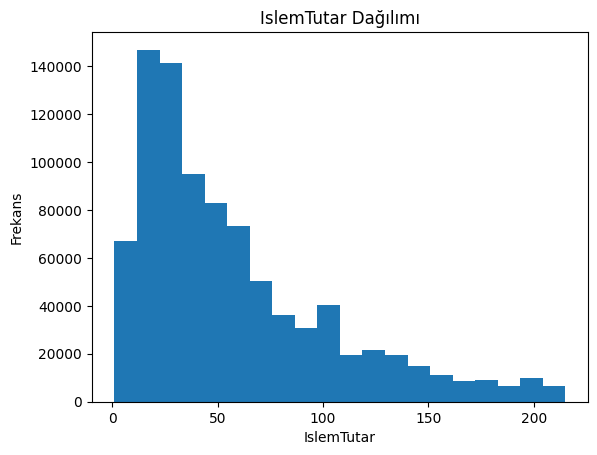

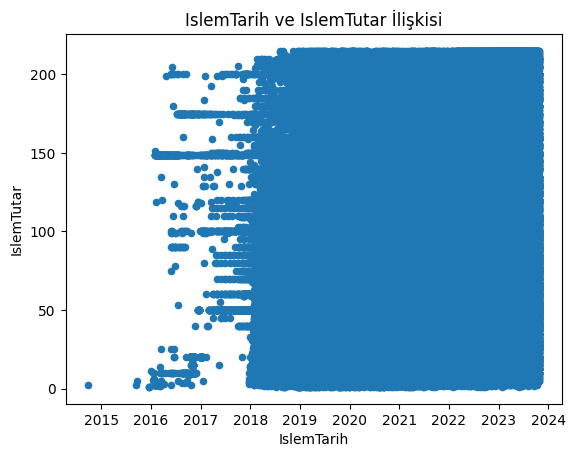

In [103]:
# Veri setindeki sütunların dağılımlarını görselleştirme (örneğin, histogramlar)
import matplotlib.pyplot as plt
data['IslemTutar'].plot(kind='hist', bins=20)
plt.xlabel('IslemTutar')
plt.ylabel('Frekans')
plt.title('IslemTutar Dağılımı')
plt.show()

# Veri setindeki iki sütun arasındaki ilişkiyi gösterme (örneğin, scatter plot)
data.plot.scatter(x='IslemTarih', y='IslemTutar')
plt.xlabel('IslemTarih')
plt.ylabel('IslemTutar')
plt.title('IslemTarih ve IslemTutar İlişkisi')
plt.show()

# Feature Engineering
"UyeDurum" sütunundaki "Aktif" ve "Pasif" değerlerini 1 ve 0'a dönüştürme
"IslemTarih" sütunundan haftanın gününü ve ayını çıkarma
"IslemTutar" sütununu Min-Max ölçeklendirme ile 0-1 aralığına getirme vs.

In [ ]:
df = pd.read_csv('cleaned_data.csv')

In [105]:
df['UyeDurum'] = df['UyeDurum'].map({'Aktif': 1, 'Pasif': 0})

In [107]:
df['IslemTarih'] = pd.to_datetime(df['IslemTarih'], errors='coerce')
df['HaftaninGunu'] = df['IslemTarih'].dt.dayofweek
df['Ay'] = df['IslemTarih'].dt.month

In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['IslemTutar'] = scaler.fit_transform(df['IslemTutar'].values.reshape(-1, 1))

In [110]:
df
df.to_csv('featuring_data.csv', index=False)

# Veri setinizi eğitim, doğrulama ve test kümelerine bölmek ve modelinizi eğitmek

In [111]:
from sklearn.model_selection import train_test_split

In [118]:
# Hedef değişkeni seçin (örneğin 'IslemTutar')
y = df['IslemTutar']

# Bağımsız değişkenleri seçin (örneğin 'Marka' ve 'IsyeriTipi')
X = df[['Marka', 'IsyeriTipi']]

# Kategorik sütunları sayısal değerlere dönüştürün
X = pd.get_dummies(X, columns=['Marka', 'IsyeriTipi'])

#Verinizi eğitim ve test kümelerine bölmek için train_test_split fonksiyonunu kullanın:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Lineer Regresyon modelini eğitin:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [122]:
from sklearn.metrics import mean_squared_error
#Modeli değerlendirmek için test verilerini kullanabilirsiniz. Örneğin, MSE (Mean Squared Error) kullanarak:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


MSE: 7.938811288817166e+17
